In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('GOOG.csv', date_parser = True)
# data.head()
# data.tail()

In [4]:
data_train = data[data['Date']<'2020-01-01'].copy()
data_train

data_test = data[data['Date']>='2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3869,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
3870,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
3871,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3872,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
3873,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000
...,...,...,...,...,...,...,...
4383,2022-01-14,2750.000000,2824.010010,2750.000000,2795.729980,2795.729980,1190700
4384,2022-01-18,2732.000000,2747.830078,2712.340088,2725.810059,2725.810059,1369100
4385,2022-01-19,2738.770020,2767.989990,2710.000000,2713.040039,2713.040039,1039800
4386,2022-01-20,2730.280029,2758.239990,2662.889893,2670.129883,2670.129883,1096500


In [5]:
training_data = data_train.drop(['Date','Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813290,51.835709,47.800831,49.982655,44871361
1,50.316402,54.336334,50.062355,53.952770,22942874
2,55.168217,56.528118,54.321388,54.495735,18342897
3,55.412300,55.591629,51.591621,52.239197,15319808
4,52.284027,53.798351,51.746044,52.802086,9232276


In [6]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[3.07083235e-04, 8.79291979e-04, 0.00000000e+00, 1.25356905e-04,
        5.43577158e-01],
       [6.89986513e-04, 2.78189186e-03, 1.73314228e-03, 3.15285500e-03,
        2.77885876e-01],
       [4.38255570e-03, 4.44951014e-03, 4.99709621e-03, 3.56690484e-03,
        2.22151352e-01],
       ...,
       [9.99726026e-01, 9.99642423e-01, 9.97425041e-01, 9.92923311e-01,
        1.24855409e-02],
       [9.89839738e-01, 9.90869803e-01, 9.85707361e-01, 9.80912804e-01,
        1.26369942e-02],
       [9.74702051e-01, 9.79457057e-01, 9.81925328e-01, 9.81583871e-01,
        1.15574353e-02]])

In [7]:
X_train = []
y_train = []

In [8]:
training_data.shape[0]

3869

In [9]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])

In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train.shape

(3809, 60, 5)

In [ ]:
##Building LSTM

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [37]:
regressor = Sequential()

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1],5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [38]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            11200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [39]:
regressor.compile(optimizer ='adam', loss = 'mean_squared_error')

In [40]:
regressor.fit(X_train, y_train, epochs = 10, batch_size= 32 )

Epoch 1/10
120/120 [==============================] - 16s 110ms/step - loss: 0.0138
Epoch 2/10
120/120 [==============================] - 15s 121ms/step - loss: 0.0024
Epoch 3/10
120/120 [==============================] - 14s 113ms/step - loss: 0.0022
Epoch 4/10
120/120 [==============================] - 15s 121ms/step - loss: 0.0019
Epoch 5/10
120/120 [==============================] - 13s 106ms/step - loss: 0.0016
Epoch 6/10
120/120 [==============================] - 13s 110ms/step - loss: 0.0016
Epoch 7/10
120/120 [==============================] - 14s 113ms/step - loss: 0.0016
Epoch 8/10
120/120 [==============================] - 14s 113ms/step - loss: 0.0014
Epoch 9/10
120/120 [==============================] - 14s 112ms/step - loss: 0.0017
Epoch 10/10
120/120 [==============================] - 14s 114ms/step - loss: 0.0014


In [41]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3869,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
3870,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
3871,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3872,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
3873,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000


In [42]:
past_60_days = data_train.tail(60)
past_60_days

,Date,Open,High,Low,Close,Adj Close,Volume
3809,2019-10-07,1204.400024,1218.203979,1203.750000,1207.680054,1207.680054,842900
3810,2019-10-08,1197.589966,1206.079956,1189.010010,1189.130005,1189.130005,1039300
3811,2019-10-09,1199.349976,1208.349976,1197.630005,1202.310059,1202.310059,867700
3812,2019-10-10,1198.579956,1215.000000,1197.339966,1208.670044,1208.670044,846600
3813,2019-10-11,1222.209961,1228.390015,1213.739990,1215.449951,1215.449951,1272700
3814,2019-10-14,1212.339966,1226.329956,1211.760010,1217.140015,1217.140015,867500
3815,2019-10-15,1220.400024,1247.329956,1220.400024,1243.010010,1243.010010,1381700
3816,2019-10-16,1241.170044,1254.739990,1238.449951,1243.640015,1243.640015,1094600
3817,2019-10-17,1250.930054,1263.324951,1249.939941,1253.069946,1253.069946,952400
3818,2019-10-18,1253.459961,1258.890015,1241.079956,1245.489990,1245.489990,1352800


In [43]:
df = past_60_days.append(data_test, ignore_index = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-07,1204.400024,1218.203979,1203.750000,1207.680054,1207.680054,842900
1,2019-10-08,1197.589966,1206.079956,1189.010010,1189.130005,1189.130005,1039300
2,2019-10-09,1199.349976,1208.349976,1197.630005,1202.310059,1202.310059,867700
3,2019-10-10,1198.579956,1215.000000,1197.339966,1208.670044,1208.670044,846600
4,2019-10-11,1222.209961,1228.390015,1213.739990,1215.449951,1215.449951,1272700
...,...,...,...,...,...,...,...
574,2022-01-14,2750.000000,2824.010010,2750.000000,2795.729980,2795.729980,1190700
575,2022-01-18,2732.000000,2747.830078,2712.340088,2725.810059,2725.810059,1369100
576,2022-01-19,2738.770020,2767.989990,2710.000000,2713.040039,2713.040039,1039800
577,2022-01-20,2730.280029,2758.239990,2662.889893,2670.129883,2670.129883,1096500


In [44]:
df = df.drop(['Date','Adj Close'], axis = 1)

In [45]:
inputs = scaler.transform(df)
inputs

array([[0.87902801, 0.88831029, 0.88587359, 0.88295285, 0.01011681],
       [0.87384509, 0.87908573, 0.87457744, 0.8688071 , 0.01249645],
       [0.87518458, 0.88081287, 0.88118346, 0.87885784, 0.0104173 ],
       ...,
       [2.04679046, 2.06746457, 2.04020383, 2.03089805, 0.0125025 ],
       [2.04032899, 2.06004628, 2.00410052, 1.99817598, 0.0131895 ],
       [1.98702364, 2.0120899 , 1.95591954, 1.9461001 , 0.02519065]])

In [46]:
X_test = []
y_test = []

In [47]:
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

In [48]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [49]:
X_test.shape
y_test.shape

(519,)

In [50]:
y_pred = regressor.predict(X_test)
y_pred

array([[ 0.85461956],
       [ 0.8556218 ],
       [ 0.8565096 ],
       [ 0.8573391 ],
       [ 0.8582042 ],
       [ 0.85918814],
       [ 0.8603814 ],
       [ 0.8618522 ],
       [ 0.86364424],
       [ 0.86576027],
       [ 0.86817515],
       [ 0.8708623 ],
       [ 0.8738144 ],
       [ 0.8770316 ],
       [ 0.88051444],
       [ 0.88423777],
       [ 0.8881288 ],
       [ 0.89201057],
       [ 0.8957389 ],
       [ 0.8992321 ],
       [ 0.9024273 ],
       [ 0.90527976],
       [ 0.90781665],
       [ 0.910026  ],
       [ 0.9119162 ],
       [ 0.9135415 ],
       [ 0.9149857 ],
       [ 0.9163554 ],
       [ 0.9177765 ],
       [ 0.91934854],
       [ 0.92112565],
       [ 0.92312425],
       [ 0.9253332 ],
       [ 0.92773575],
       [ 0.93027997],
       [ 0.9328529 ],
       [ 0.93519557],
       [ 0.93705267],
       [ 0.93823004],
       [ 0.9385146 ],
       [ 0.9377549 ],
       [ 0.93599516],
       [ 0.9333698 ],
       [ 0.93006796],
       [ 0.92621475],
       [ 0

In [51]:
scaler.scale_

array([7.61069658e-04, 7.60849739e-04, 7.66360329e-04, 7.62571888e-04,
       1.21162615e-08])

In [52]:
scale = 1/7.61069658e-04
scale

1313.940175499678

In [53]:
y_test = y_test*scale
y_pred = y_pred*scale

In [54]:
### Visualising the Result

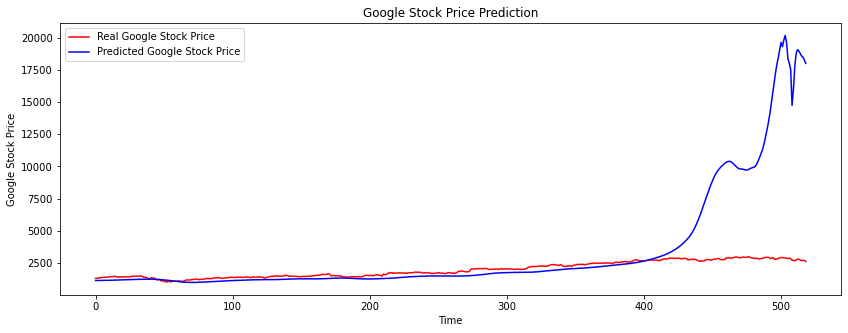

In [55]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()